## Unit 1 Capstone: Narrative analytics and experimentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### Background
Let's assume I am a data scientist at a famous real estate company in Ames, Iowa and my team is looking for the best strategy to increase sale and maximize profit of the company.

### Hypothesis
There are several parameters related to the house price, so as a data scientist, I need to find out the most correlated parameter with the price and emphasize it in a sale advertisement of the house to increase sales of the houses.


**Reference**

The following project examines the dependent variable "SalePrice" in a statistical view from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), the Ames Housing Dataset compiled by Dean De Cock. The dataset includes housing transactions traded from Jan 2006 to Jul 2010. I analyzed the dataset in my [Thinkful Prep Course Capston project](https://github.com/LegendaryKim/Thinkful_Unit4_Prep_Course_Capstone/blob/master/Prep_Course_Capstone_Project.ipynb). In this dataset, there are 79 independent parameters and "Id" and "SalePrice", the dependent one.


In [2]:
train = pd.read_csv('./Data/AmesHousingDataset/train.csv')
print(train.shape)

(1460, 81)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We drop "Id" column from the dataset.

In [5]:
train_Id = train.Id
train.drop('Id', axis = 1, inplace = True)

In [6]:
print("the train data size after dropping Id: ", train.shape)

the train data size after dropping Id:  (1460, 80)


Like [Thinkful Prep Course Capston project](https://github.com/LegendaryKim/Thinkful_Unit4_Prep_Course_Capstone/blob/master/Prep_Course_Capstone_Project.ipynb), I transform the dependent variable "SalePrice logarithmically as "LSalePrice" to make it unskewed and normally distributed.

In [7]:
train['LSalePrice'] = np.log(train['SalePrice'])

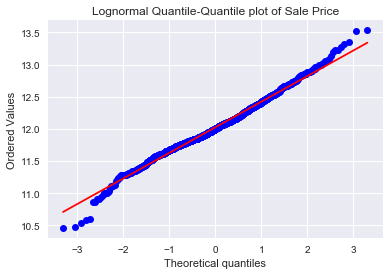

In [8]:
stats.probplot(train['LSalePrice'], dist="norm", plot=plt)
plt.title('Lognormal Quantile-Quantile plot of Sale Price')
plt.show()

### Feature Correlation
To find out the parameter which are mostly correlated parameters in the dataset, I calcualte the correlation matrix and plot it using heatmap in Seaborn.

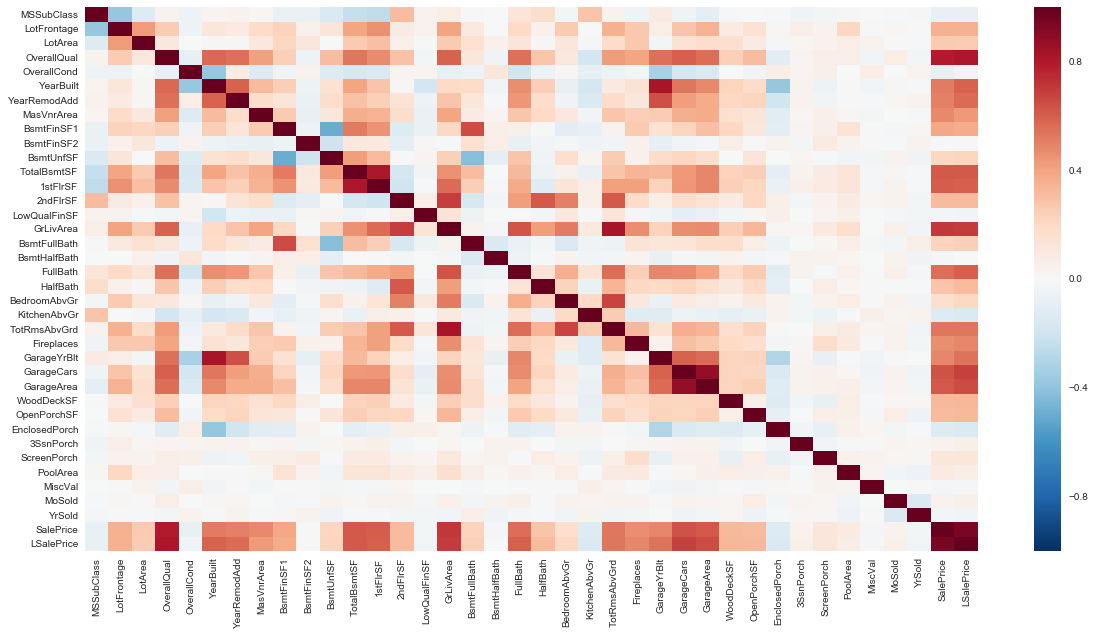

In [9]:
plt.subplots(figsize=(20,10))
corr_train = train.corr()
sns.heatmap(corr_train)
plt.show()

Let's arrange the index in the matrix by sorting the values with "LSalePrice".

In [10]:
Sort_corr_cols = corr_train['LSalePrice'].sort_values(ascending=False).drop(['LSalePrice', 'SalePrice']).index
Sort_corr_cols = list(Sort_corr_cols)
Sort_corr_cols.insert(0,'LSalePrice')

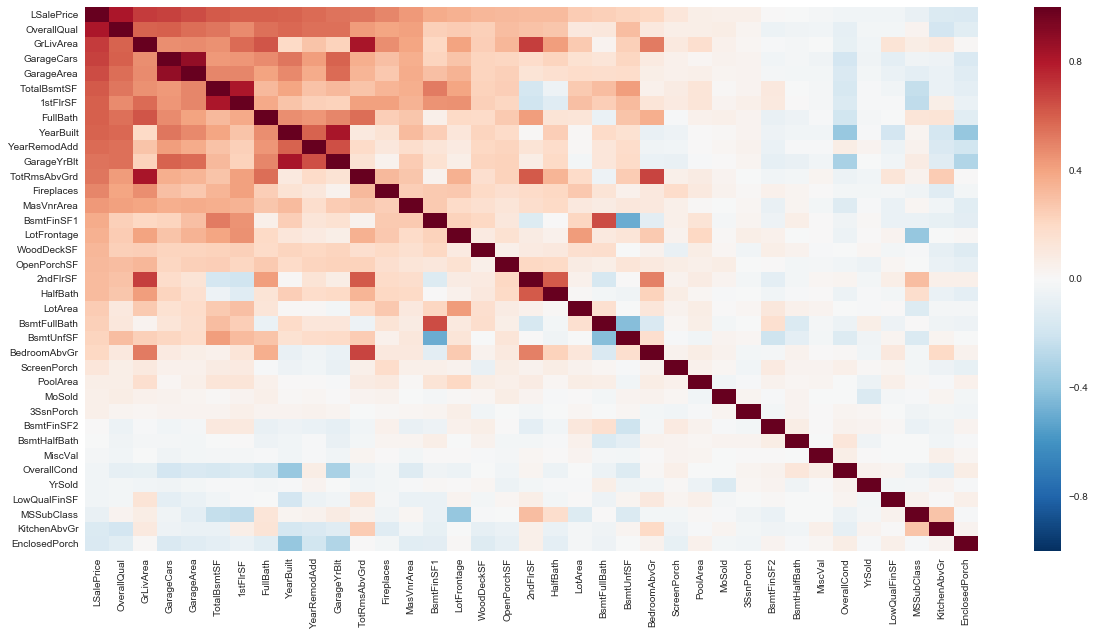

In [11]:
plt.subplots(figsize=(20,10))
sns.heatmap(train[Sort_corr_cols].corr())
plt.show()

So, the top 3 mostly correlated parameters with "LSalePrice" are "OveralQual", "GrLivArea", and "GarageCars"; "OveralQual" is "Rates the overall material and finish of the house", "GrLiveArea" is "Above grade (ground) living area square feet", and "GarageCars" is "Size of garage in car capacity".

### Rollout Plan
Knowing the mostly considered parameters in house sales and advertise them is important to tempt our future customers to purchase houses. So, we can set an A/B test as building two versions of commercials; one emphasizes the top 3 parameters of houses, "LSalePrice", "OveralQual", and "GarageCars" and the other doese not.


We need to be careful in the experiment, we will only select 10% of houses in the company at random and perform the prescribed test during the first month. In a t-test, if we found out the difference within the two sales figures with an extreme p-value (p <= 0.05) , we will apply the test at 50% for two month. We could get 200+ cases totally.

**Principal Metric**
The key metric in this experiment is the number of sales.

**Second Metric** We also need to check how long the customers spend to make their decision. 



### Additional experiment on "Neighborhood"

In [12]:
train_LS_NH = train[['LSalePrice', 'Neighborhood']]

In [13]:
train_LS_NH.head()

,LSalePrice,Neighborhood
0,12.247694,CollgCr
1,12.109011,Veenker
2,12.317167,CollgCr
3,11.849398,Crawfor
4,12.429216,NoRidge


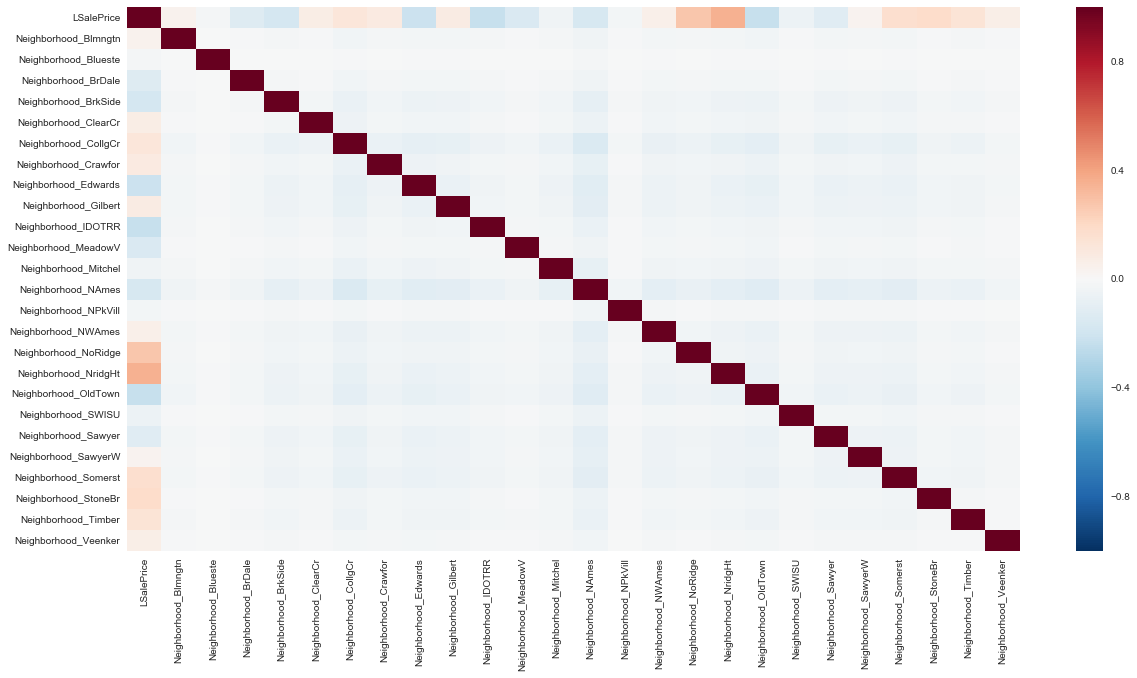

In [14]:
# get_dummies to build correation matrix for "string" categorical variables.
plt.subplots(figsize=(20,10))
sns.heatmap(pd.get_dummies(train_LS_NH).corr())
plt.show()

In [15]:
Sort_corr_cols = pd.get_dummies(train_LS_NH).corr()['LSalePrice'].sort_values(ascending=False).index
Sort_corr_cols = list(Sort_corr_cols)

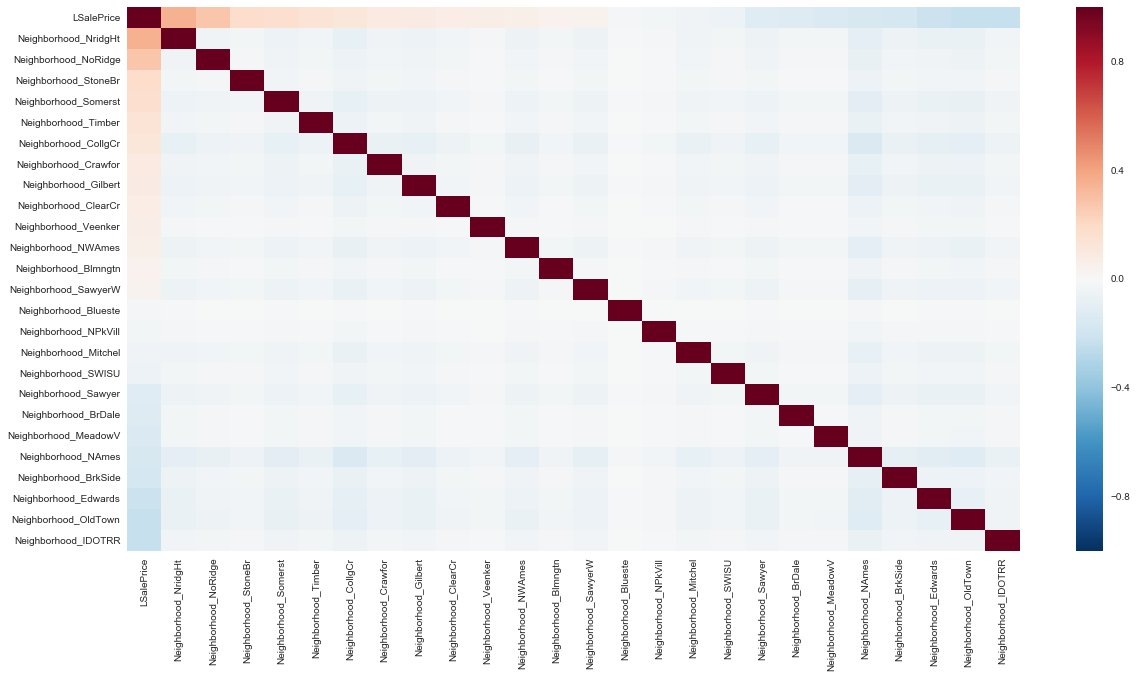

In [16]:
plt.subplots(figsize=(20,10))
sns.heatmap(pd.get_dummies(train_LS_NH)[Sort_corr_cols].corr())
plt.show()

In [17]:
train_LS_NH.corr()

,LSalePrice
LSalePrice,1.0
